In [49]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [50]:
for i in range(8):
        if i==0:
            train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        else:
            temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
            train=pd.concat([train,temp])

In [51]:
train.columns

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes', 'CLASS'],
      dtype='object')

array([[<Axes: title={'center': 'm_earth'}, xlabel='[CLASS]'>,
        <Axes: title={'center': 'max_info_p'}, xlabel='[CLASS]'>],
       [<Axes: title={'center': 'mutual_info'}, xlabel='[CLASS]'>,
        <Axes: title={'center': 'sim_faltantes'}, xlabel='[CLASS]'>]],
      dtype=object)

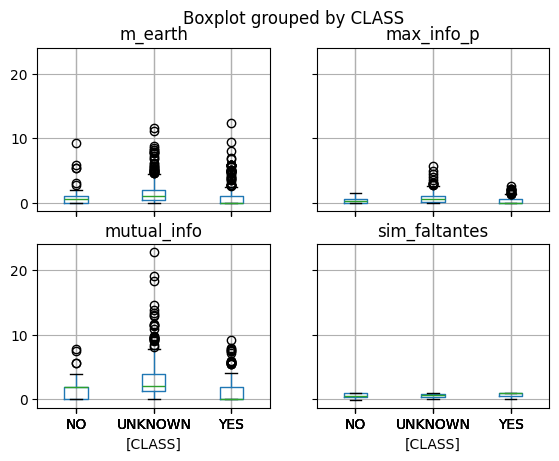

In [89]:
train.boxplot(by="CLASS")

<Axes: title={'center': 'm_earth'}, xlabel='CLASS'>

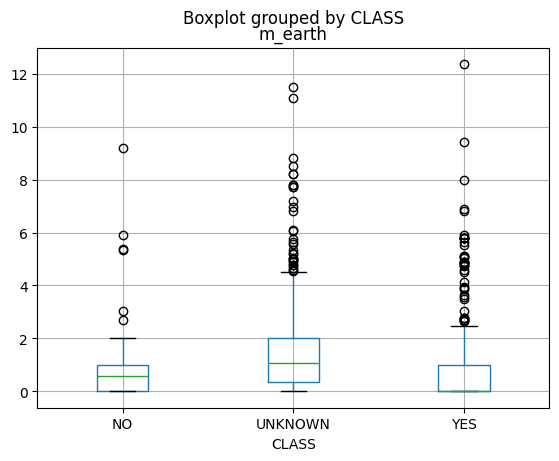

In [53]:
train.boxplot(by="CLASS",column="m_earth")

array([[<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>,
        <Axes: title={'center': 'relaciones'}, xlabel='CLASS'>],
       [<Axes: title={'center': 'entropias'}, xlabel='CLASS'>, <Axes: >]],
      dtype=object)

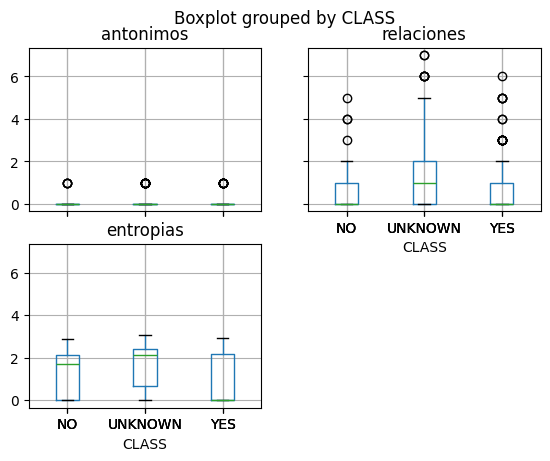

In [54]:
train.boxplot(by="CLASS",column=["antonimos","relaciones","entropias"])

In [55]:
train=train.drop(["distancias","antonimos","relaciones","entropias","suma"],axis=1)
train

,mutual_info,m_earth,max_info_p,sim_faltantes,CLASS
0,0.000000e+00,0.000000,0.000000,1.000000,YES
1,1.426637e-12,5.346563,0.000000,0.000000,NO
2,0.000000e+00,0.000000,0.000000,1.000000,UNKNOWN
3,0.000000e+00,0.000000,0.000000,1.000000,YES
4,1.965056e+00,0.978448,0.231184,0.037146,YES
...,...,...,...,...,...
95,1.853584e+00,0.616965,0.424818,0.258356,UNKNOWN
96,0.000000e+00,0.000000,0.000000,1.000000,YES
97,0.000000e+00,0.000000,0.000000,1.000000,UNKNOWN
98,0.000000e+00,0.000000,0.000000,1.000000,NO


In [56]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [57]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [58]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

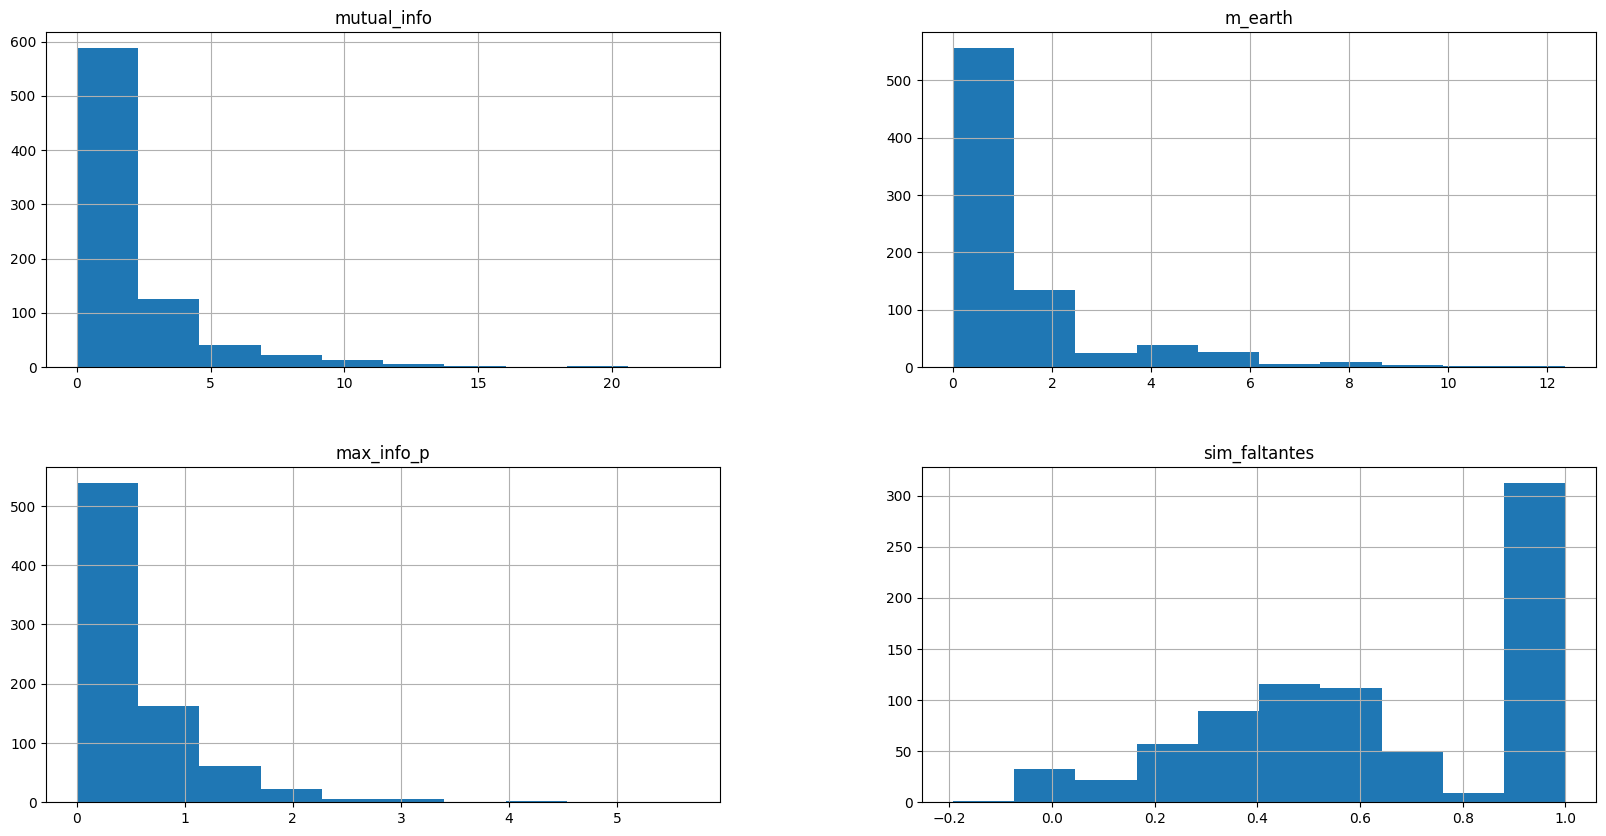

In [59]:
train.hist(figsize=(20,10))
plt.show()

In [60]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [61]:
test=test.drop(["distancias","antonimos","relaciones","entropias","suma"],axis=1)
test

,mutual_info,m_earth,max_info_p,sim_faltantes,CLASS
0,1.783120e+00,6.176232,0.271529,0.105568,YES
1,1.926521e+00,0.701502,0.393066,0.338005,YES
2,2.273737e-13,4.289287,0.000000,0.000000,YES
3,0.000000e+00,0.000000,0.000000,1.000000,YES
4,1.812693e+00,0.973838,0.412710,0.413161,NO
...,...,...,...,...,...
95,0.000000e+00,0.000000,0.000000,1.000000,YES
96,0.000000e+00,0.000000,0.000000,1.000000,NO
97,1.867865e+00,0.589826,0.467463,0.485553,UNKNOWN
98,1.811190e+00,1.010164,0.353093,0.234342,UNKNOWN


In [62]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [63]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [64]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [65]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [66]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [67]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [68]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
model.decision_function(X)

array([ 7.25426228e-01,  8.83417117e-01,  7.25426228e-01,  7.25426228e-01,
       -3.22407211e-01,  7.25426228e-01,  7.25426228e-01,  7.25426228e-01,
       -3.45638801e-01, -1.24142044e+00,  7.25426228e-01,  7.25426228e-01,
       -1.01590798e-01,  2.82190626e-02,  9.44797080e-01,  7.25426228e-01,
        7.25426228e-01,  2.84530523e-02,  7.27679076e-02, -1.25771246e-01,
       -2.80774284e-02,  7.25426228e-01,  7.25426228e-01,  7.25426228e-01,
       -4.30016482e-02,  7.25426228e-01,  7.25426228e-01, -1.04429168e-01,
       -4.74876265e-02,  7.96429226e-02, -3.24854872e-03,  7.25426228e-01,
        1.55519046e-02, -4.85368998e-02,  7.25426228e-01,  7.25426228e-01,
        7.25426228e-01,  1.78381273e-01, -7.34090242e-03,  7.25426228e-01,
        7.25426228e-01, -2.63063551e-02, -6.01499203e-01,  1.17123021e-01,
        7.25426228e-01,  7.25426228e-01,  7.25426228e-01,  7.25426228e-01,
        7.25426228e-01,  7.25426228e-01, -1.68364067e-01,  1.10622511e-01,
       -1.20555275e+00,  

In [70]:
labels=train.columns[:-1]
labels

Index(['mutual_info', 'm_earth', 'max_info_p', 'sim_faltantes'], dtype='object')

In [71]:
model.classes_

array([0, 1])

In [72]:
model.coef_[0]

array([-1.09215746,  0.20287048,  0.21191383,  0.14267009])

In [73]:
coeficientes=model.coef_[0]

In [74]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  2 max_info_p 0 mutual_info


In [75]:
n_columns=train.shape[1]-1

In [76]:
n_columns

4

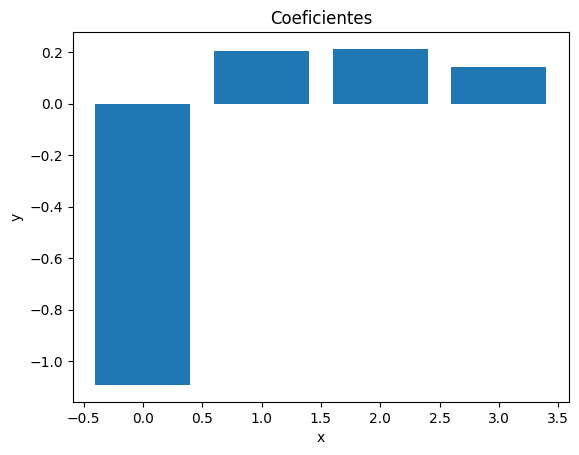

In [77]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [78]:
predictions = model.predict(X_test)

In [79]:
print(confusion_matrix(y_test, predictions))

[[225 165]
 [169 241]]


In [80]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.58
precision:  0.59
recall 0.59
f1_score:  0.59
matthews_score:  0.16


In [81]:
X_train.shape

(800, 4)

In [82]:
X_test.shape

(800, 4)

In [83]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [84]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [85]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.073045)


In [86]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.710000 (0.086452)


In [87]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.650000 (0.068921)


In [88]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.210000 (0.145100)
